# Human Resource Department

If you are running a business, you are likely to have problems with hiring new employess. You are also likely to know that the cost of hiring an employee is arguably one of the most expensive parts of running a business. According to [toggl hire](https://toggl.com/blog/cost-of-hiring-an-employee):

> Small business owners spend around 40% of their working hours on tasks that do not generate income, such as hiring.

Therefore, this project's main objective is to solve one of the biggest problems when it comes to hiring new employees: keep them working with you.

The dataset and articles used in this project are listed below:
- Database (`Human_Resources.csv`): [_IBM HR Analytics Employee Attrition & Performance_](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)
- Salary Calculation: [_Monthly and daily salary: definitions and calculation_](https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary) and [_How to Calculate for the Daily Rate from Your Monthly Salary?_](https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-)
- Stock: [_What You Need To Know If Your Job Offers Employee Stock Options_](https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time.)

## 1.0 Importing libraries and datasets

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [26]:
raw_df = pd.read_csv('Human_resources.csv')
raw_df.shape

(1470, 35)

In [27]:
raw_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## 2.0 Exploratory Data Analysis

In [28]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
raw_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
clean_df = raw_df.copy()
clean_df['Attrition'] = clean_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
clean_df['OverTime'] = clean_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
clean_df['Over18'] = clean_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [31]:
pd.isnull(clean_df).sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Therefore, we can conclude there is no missing data in this dataset.

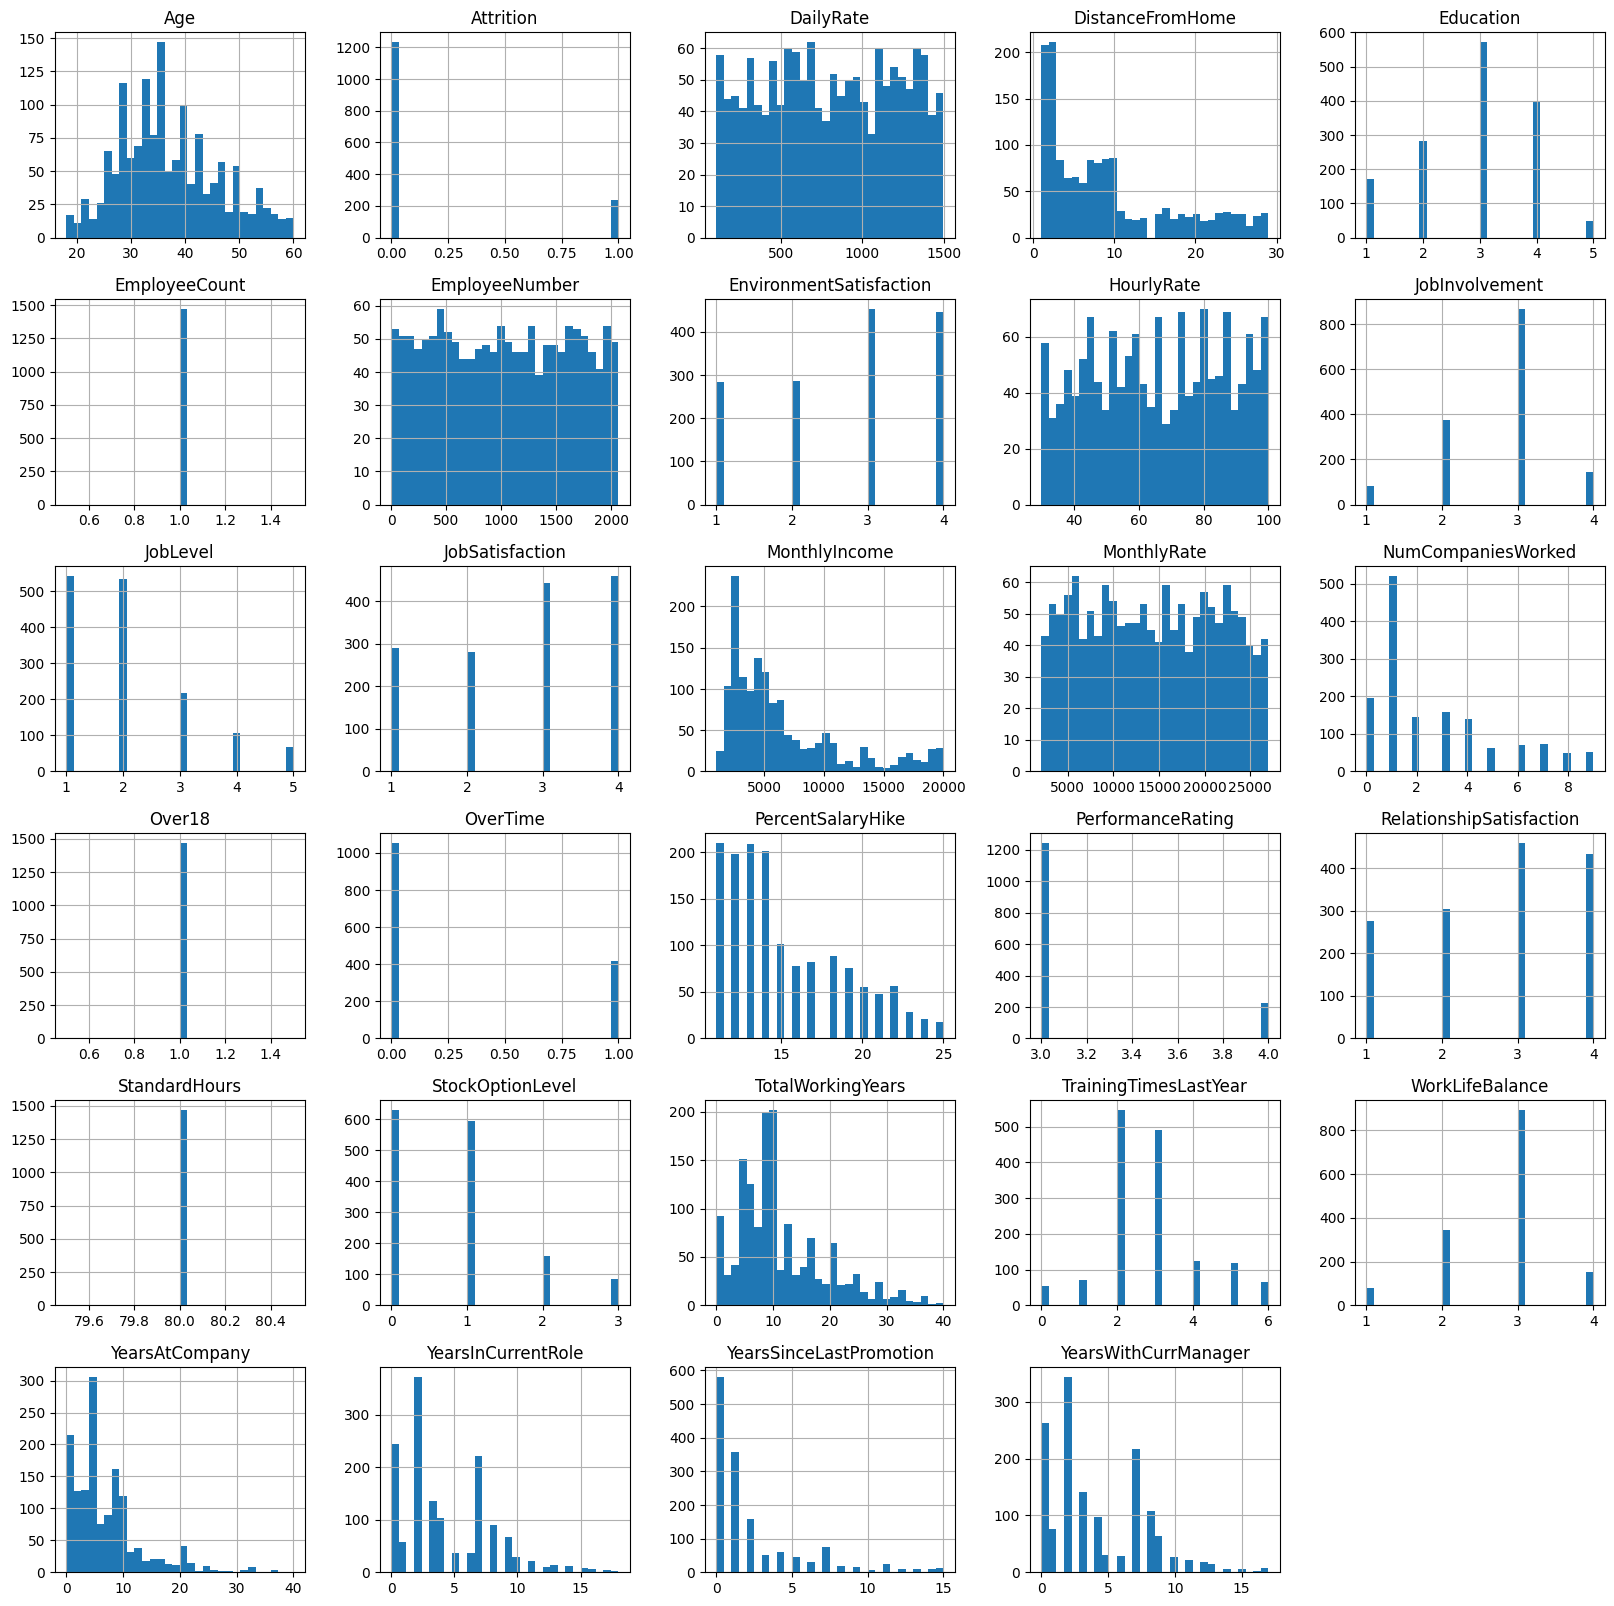

In [32]:
clean_df.hist(bins=30, figsize=(20,20))
plt.show()

Analyzing those graphs above, we can notice some interesting facts:

1- The columns `EmployeeCount`, `EmployeeNumber`, `Over18`, `StandardHours` have unique or constant values, so we do not need them;

2- Most of employees are Bachelor (level 3);

3- Most of employees are High involved in their jobs (level 3);

4- Most of employees are High or Very High satisfied with their job or environment;

5- Most of employees are working in a "Low Job Level" (level 1 or 2);

6- Most of employees were promoted in less than 3 years;

7- Most of employees are new in the company (less or equals to 10 years);

In [34]:
clean_df = clean_df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1).reset_index()
clean_df.head()

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


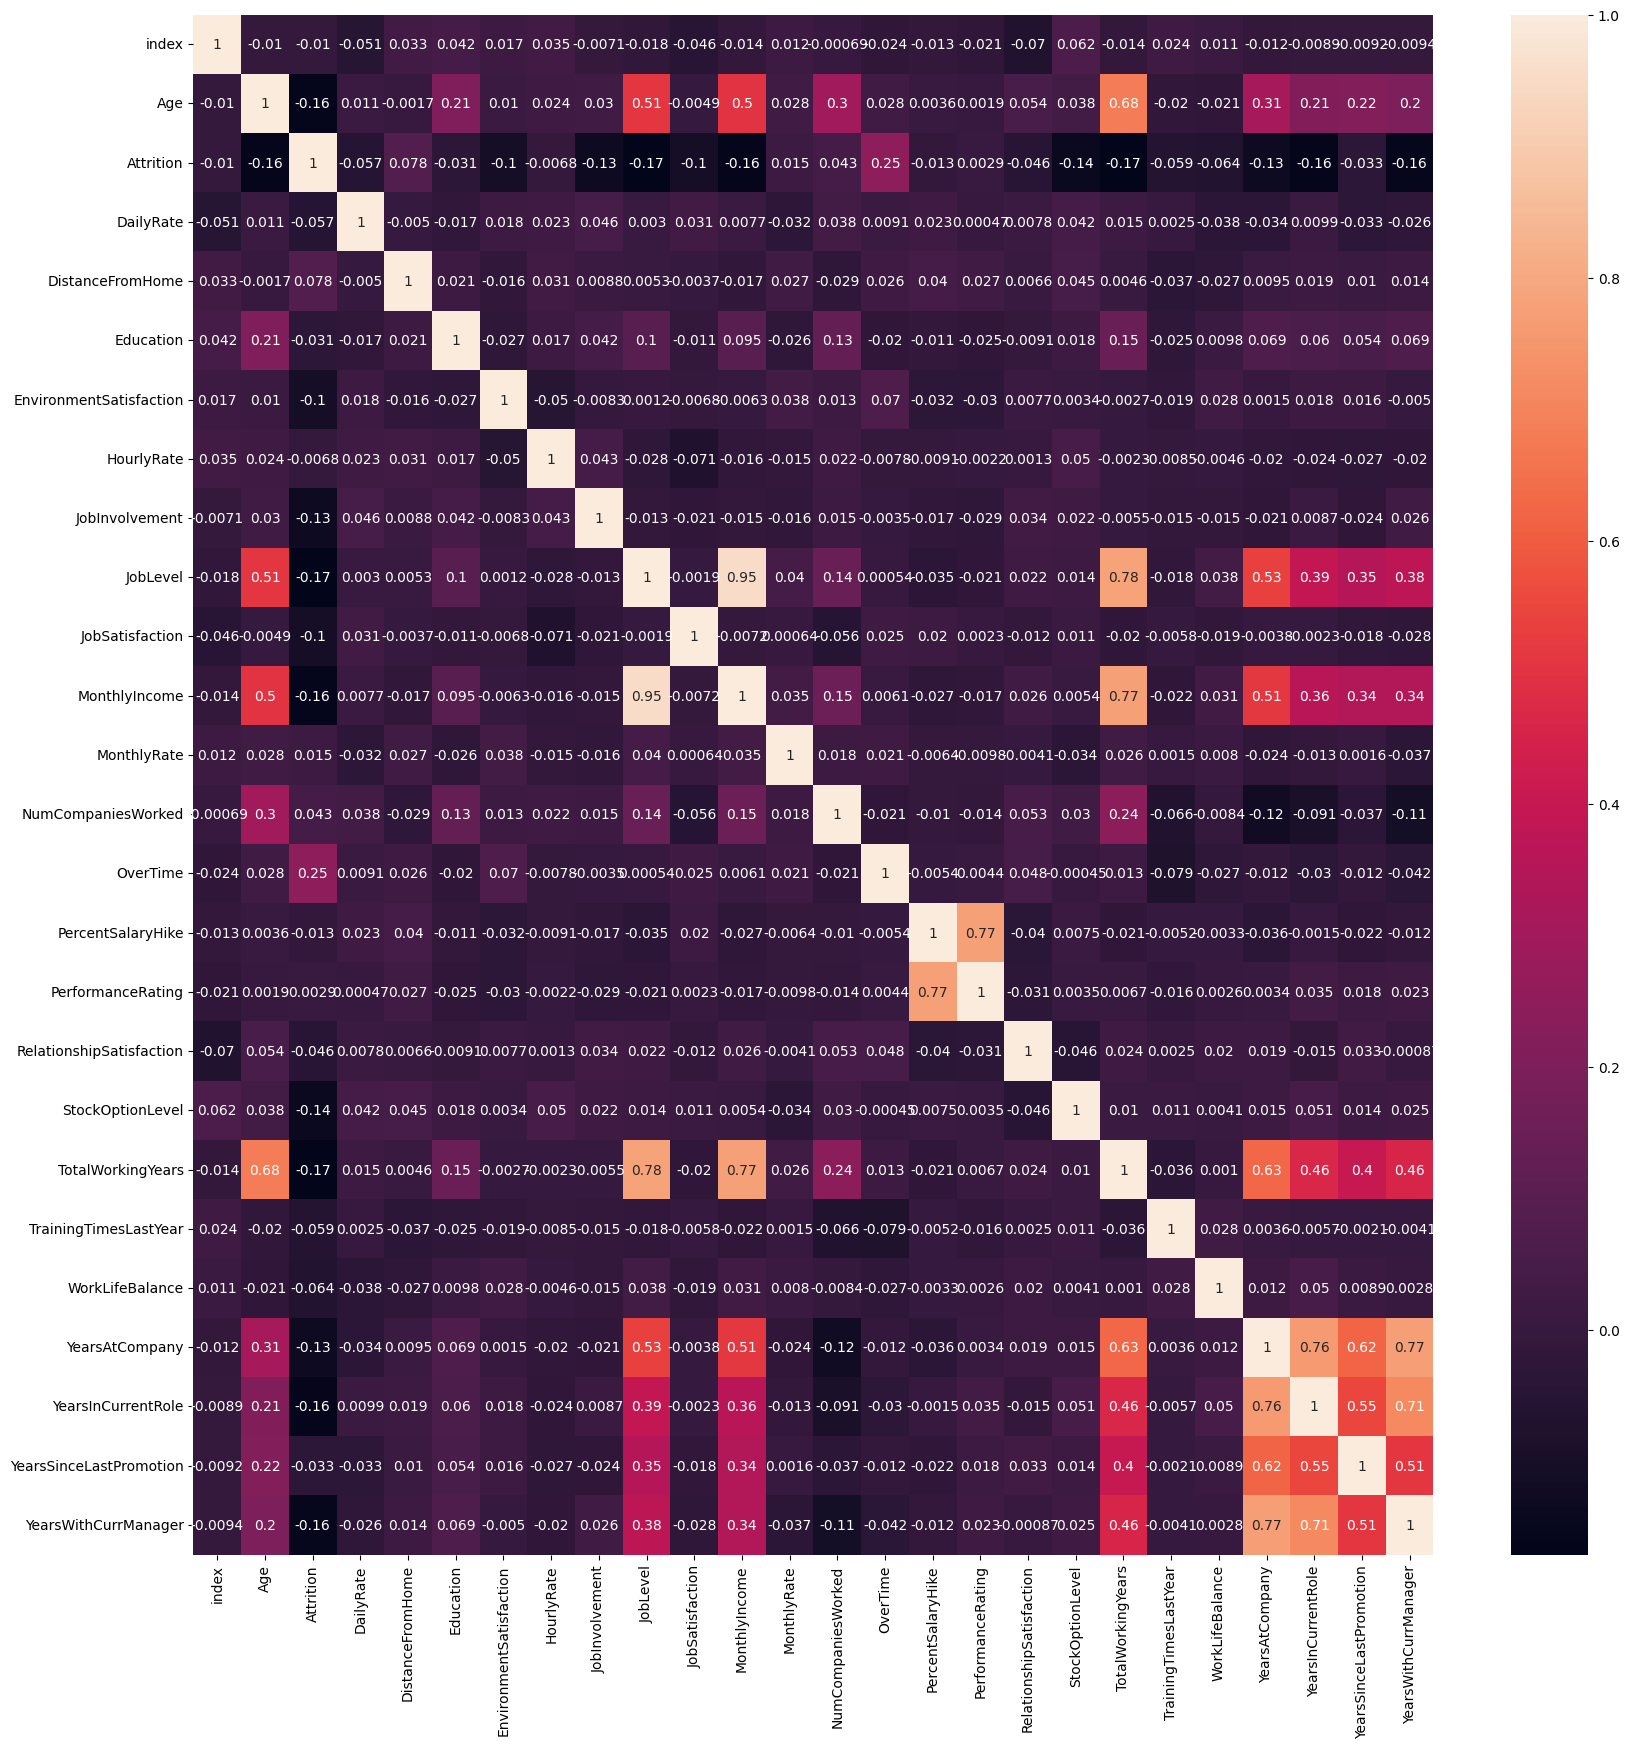

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(clean_df.corr(), annot=True)
plt.show()

Analyzing the heatmap above, we can notice that:

1- `JobLevel` is very high correlated to `MonthlyIncome`, medium correlated to `YearsAtCompany` and small correlated to `YearsInCurrentRole`, `YearsSinceLastPromotion` and `YearsWithCurrManager`;

2- `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion` and `YearsWithCurrManager` are high correlated;

3- `TotalWorkingYears` are high correlated to `Age`, `JobLevel` and `MonthlyIncome`, and medium correlated to `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion` and `YearsWithCurrManager`;

4- `Age` is medium correlated to `JobLevel` and `MonthlyIncome`;

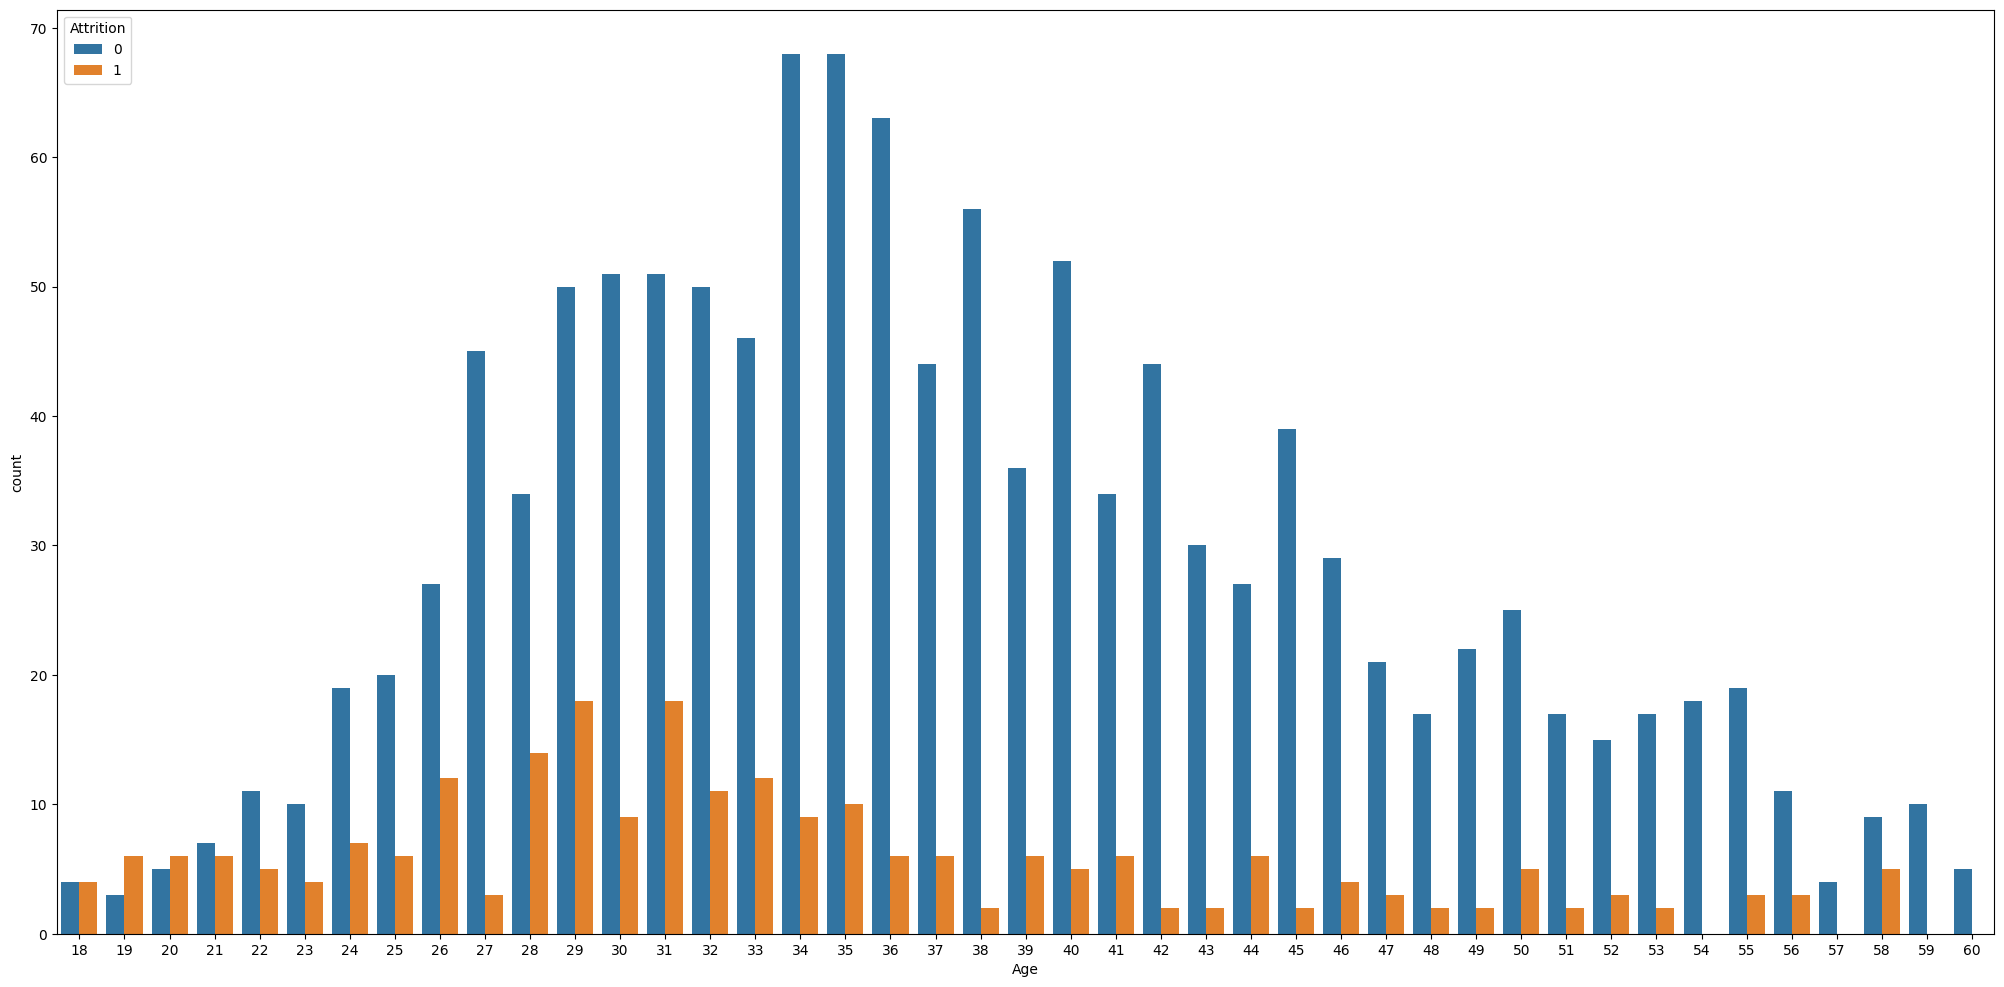

In [48]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=clean_df)
plt.show()

Here we can see that people between below 21 years are more likely to have Attrition an quit the company.

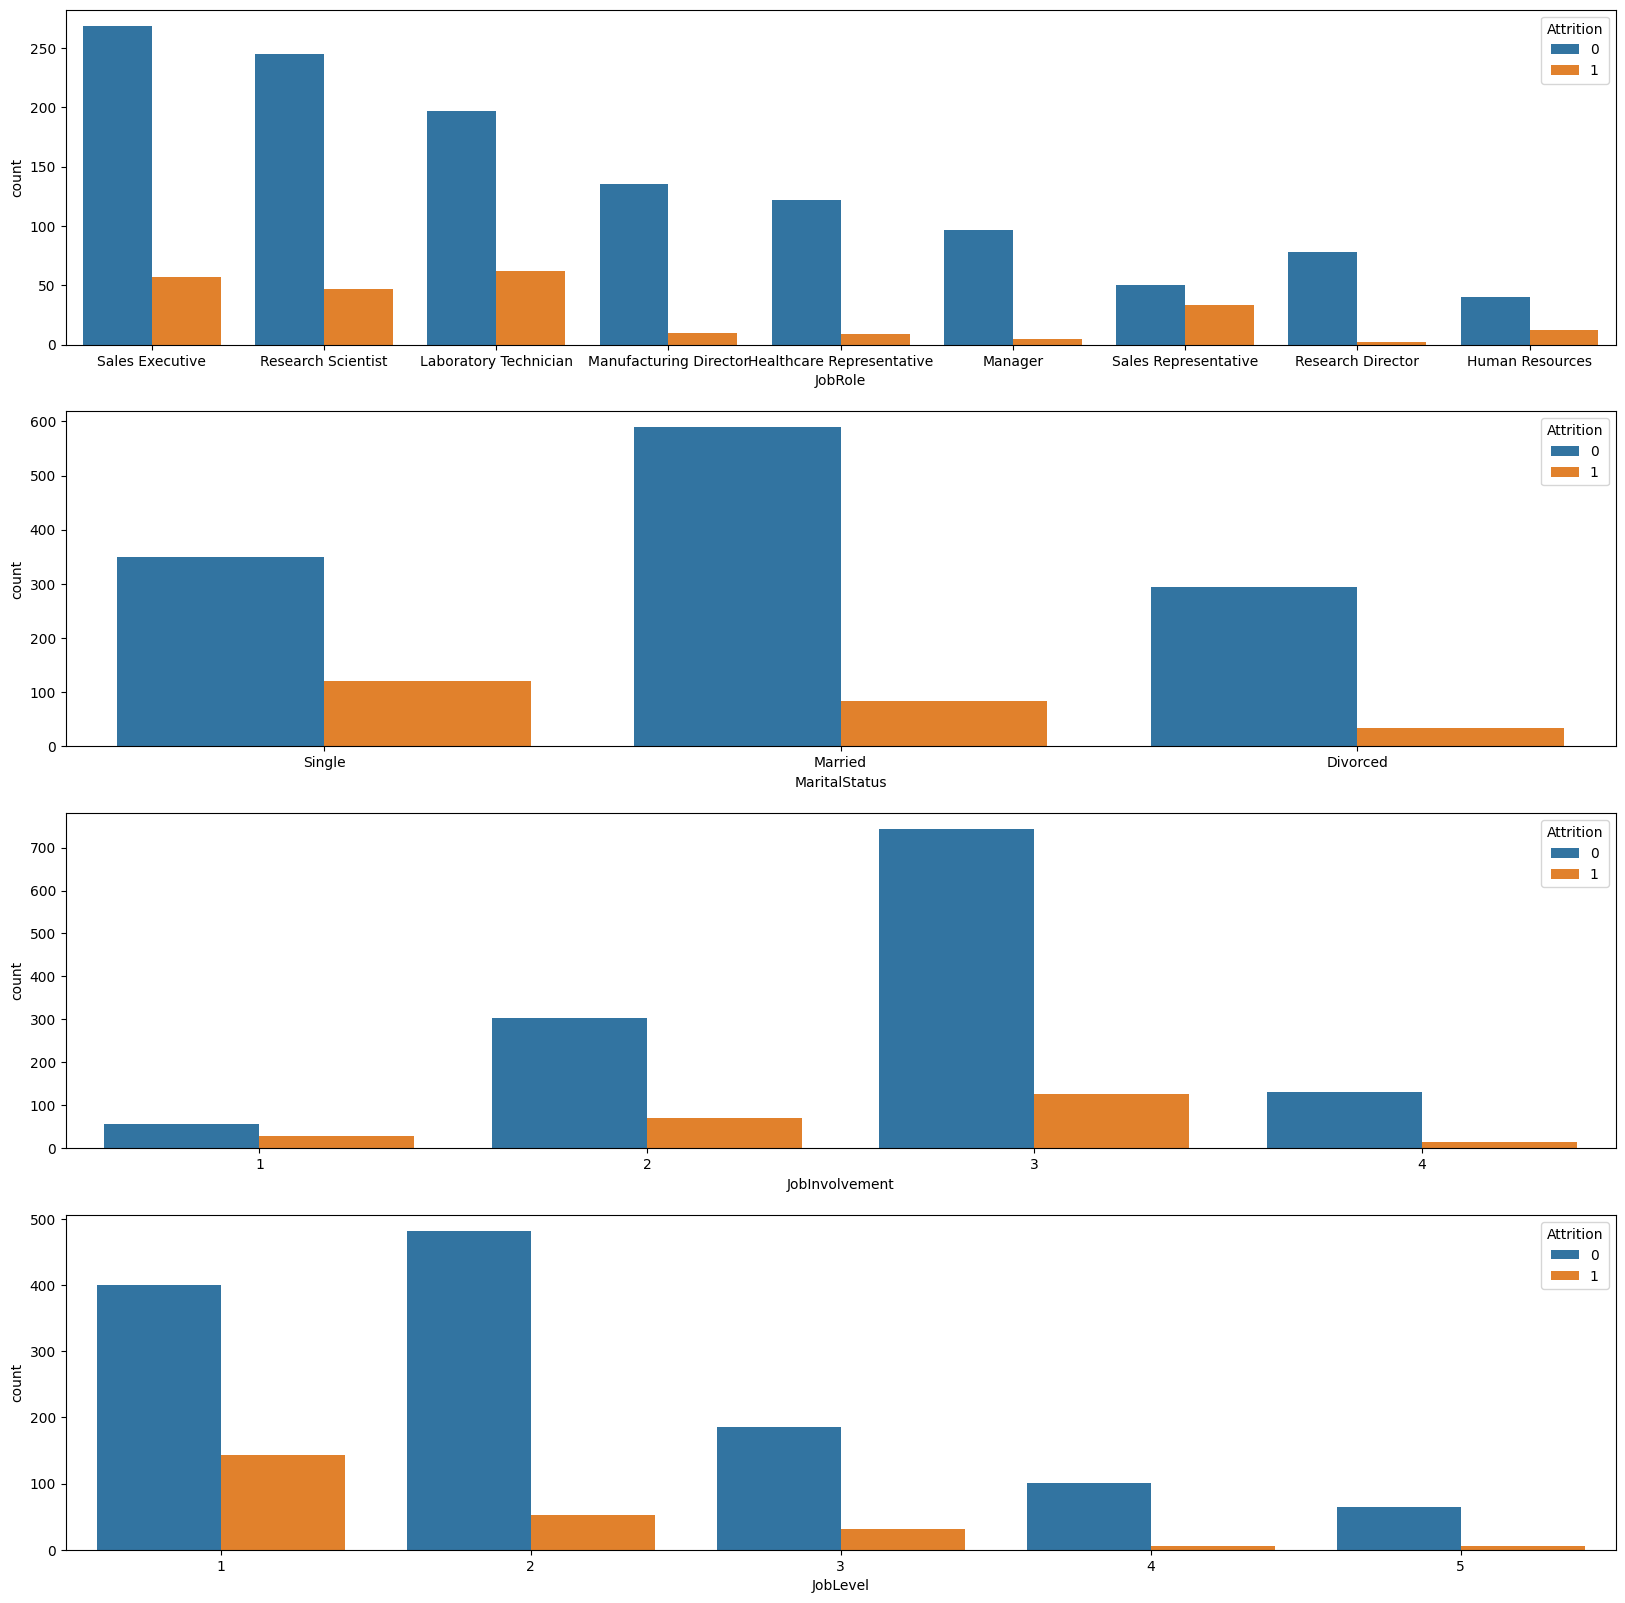

In [51]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = clean_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = clean_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = clean_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = clean_df)

plt.show()

Those graphs above are very interesting and some of them show us some counter-intuitive information. For instance, we can see that the highest number of "Yes" Atrittion occurs when Job Involvement is High (level 3), even though the highest relative value occurs when Job Involvement is Low (level 1).

As we might expect, most of employees in Job Level 1 leave their jobs, probably because they are looking for a better pay or work conditions. Also, single people are more likely to leave their jobs then married or divorced people, perhaps because they are young and/or have fewer obligations/responsabilities.

Finally, we can conclude that the nominal value of "Yes" Atrittion is higher for Sales Executive and Research Scientist, although the relative value is higher for Sales Representative. In this case, you should pay more attention to relative values than to absolute values.

On the graph below, we are going to use the Kernel Density Estimate (KDE) to estimate the probability density function of `DistanceFromHome` and `TotalWorkingYears`.

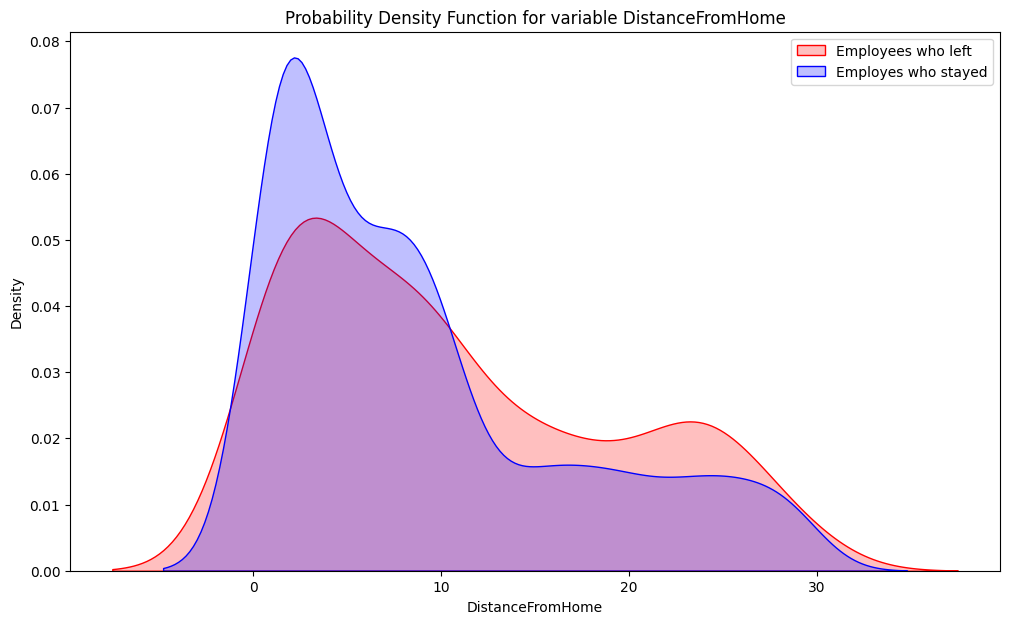

In [56]:
plt.figure(figsize=(12,7))
sns.kdeplot(clean_df['DistanceFromHome'].loc[clean_df['Attrition'] == 1], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(clean_df['DistanceFromHome'].loc[clean_df['Attrition'] == 0], label = 'Employes who stayed', shade = True, color = 'b')
plt.title('Probability Density Function for variable DistanceFromHome')
plt.legend()
plt.show()

To better understand the prabability density function, we have to create some "hypothesis", just like:

1- What is the probability to a employee leave the company living less or equal to 10 km from the workplace?

2- What is the distance with the highest probability of a employee leaving the company? And stay?

Well, to answer the first question we should integrate the probability density function from 0 to 10 km, which would give us more than 40%. While to answer the second question is much simpler, we just have to found the `DistanceFromHome` values that give us the highest Density value. Therefore, the distance with the highest probability of a employee leaving the company is approximately 4 km, while the distance for the emplyee to stay is 2 km.

This probability function also show us that there are a higher probability of a employee leaving the company if they live  10 km or more away from workplace.

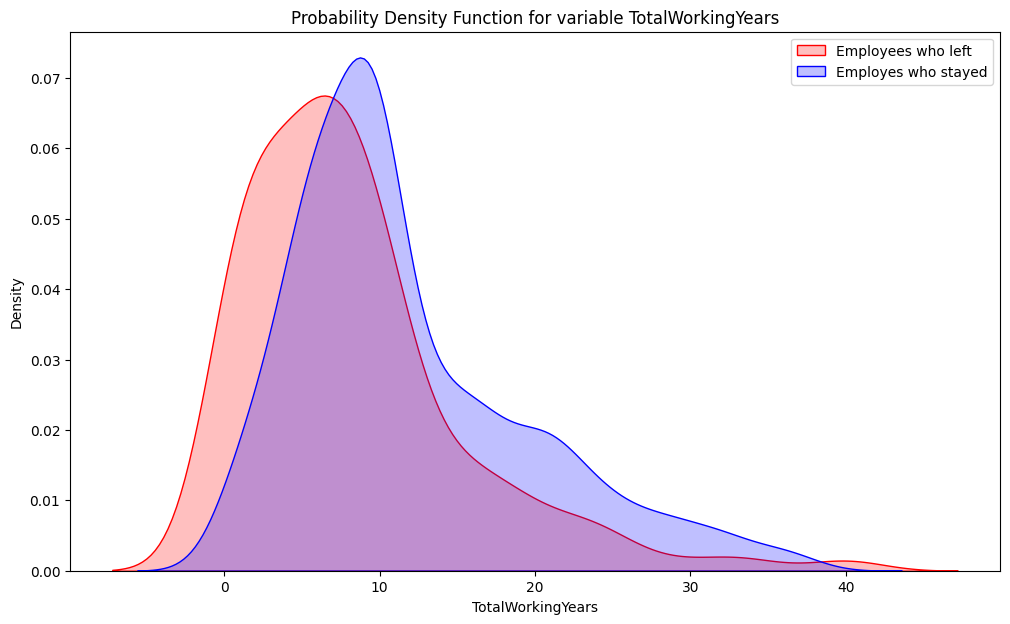

In [57]:
plt.figure(figsize=(12,7))
sns.kdeplot(clean_df['TotalWorkingYears'].loc[clean_df['Attrition'] == 1], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(clean_df['TotalWorkingYears'].loc[clean_df['Attrition'] == 0], label = 'Employes who stayed', shade = True, color = 'b')
plt.title('Probability Density Function for variable TotalWorkingYears')
plt.legend()
plt.show()

A very similar pheenomenon occurs with `TotalWorkingYears` attribute. The standard deviation and mean are very similar for both "employees who left" and "employees who stayed" in the company. However, the distribution shows that an employee are more likely to stay in the company if `TotalWorkingYears` is greater than approximately 9 years. 

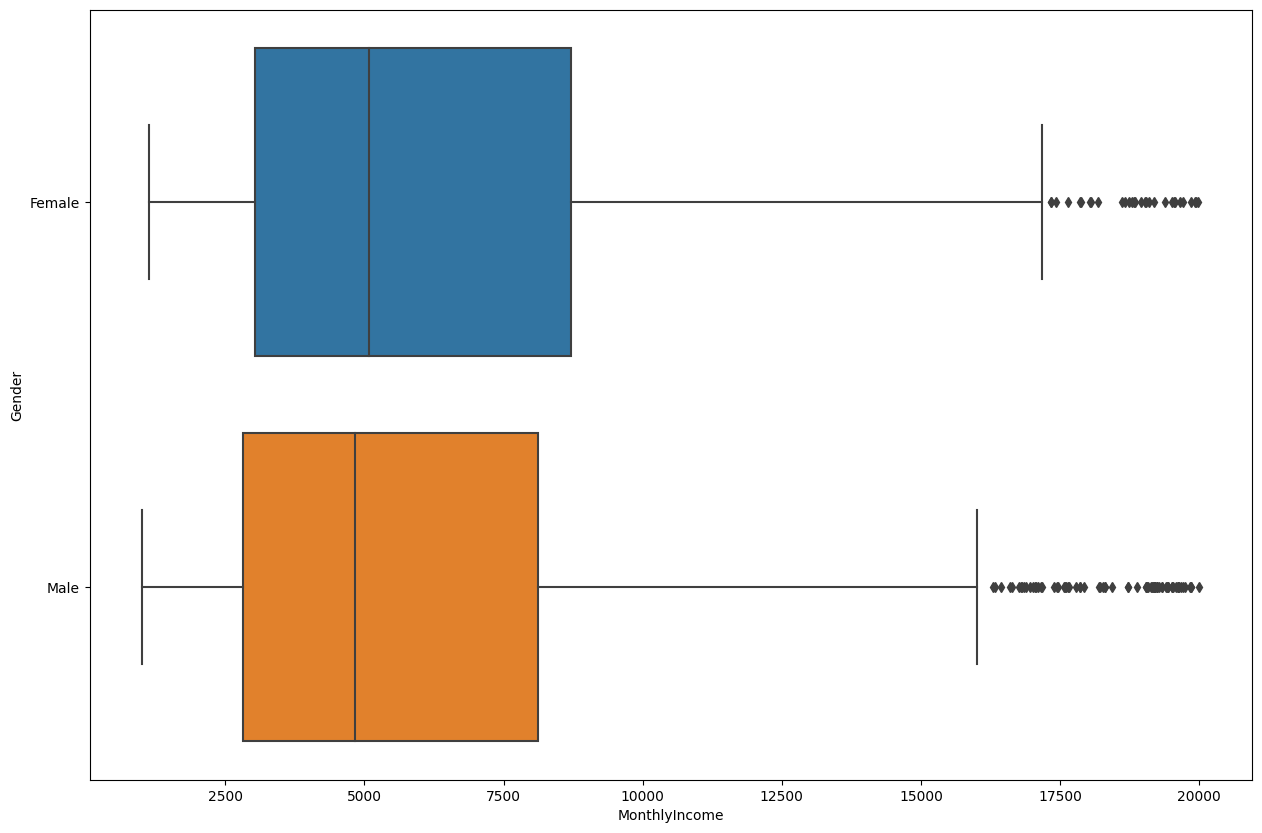

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=clean_df)
plt.show()

This graph shows that in this company women has a higher income than men, which is a rare situation, given that we live in a mostly sexist world.

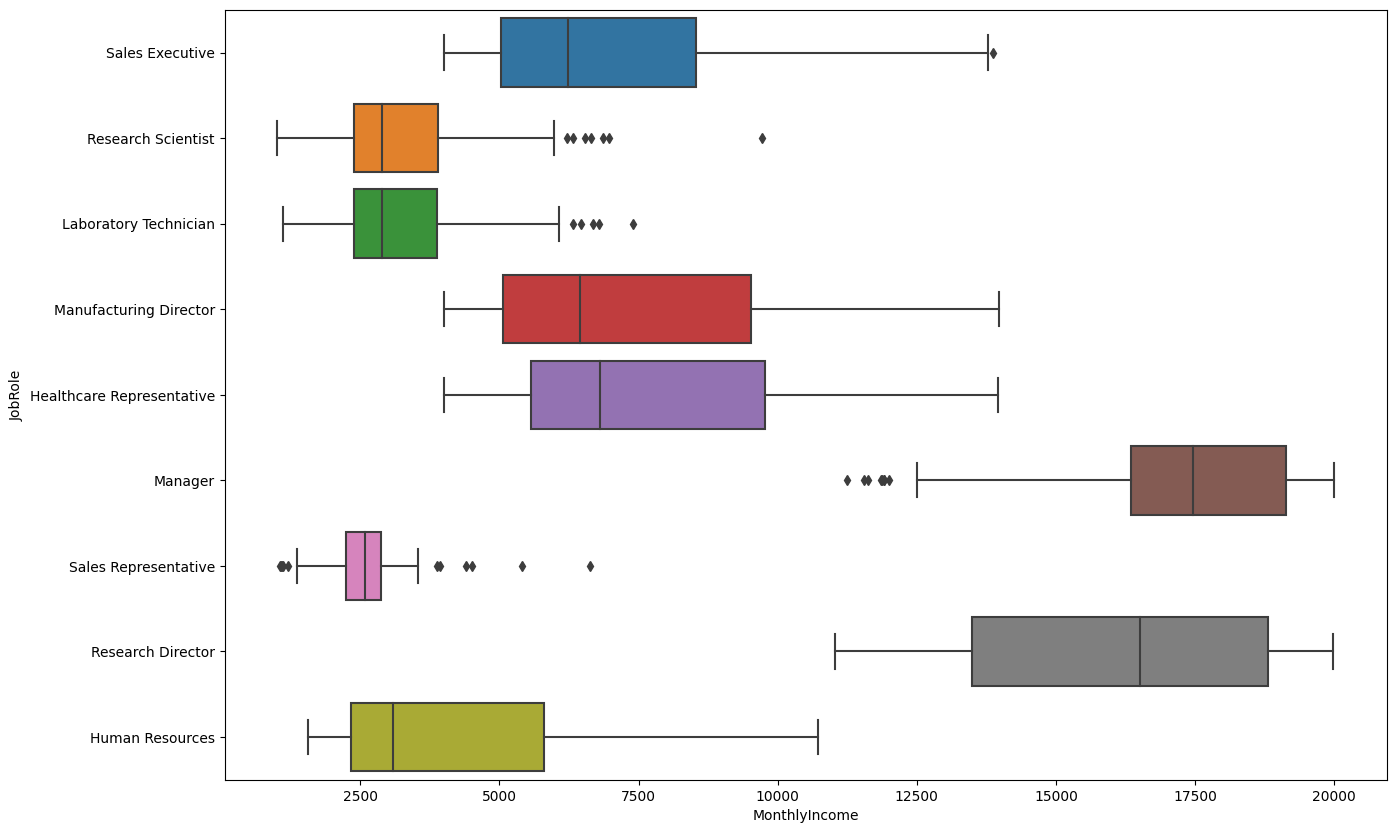

In [60]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=clean_df)
plt.show()

## 3.0 Data Preprocessing

In [102]:
cat_features = clean_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
cat_features.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [106]:
new_columns = list()

for col in cat_features:
    new_columns += [f"{col}-{x}" for x in cat_features[col].unique()]

print(new_columns)

['BusinessTravel-Travel_Rarely', 'BusinessTravel-Travel_Frequently', 'BusinessTravel-Non-Travel', 'Department-Sales', 'Department-Research & Development', 'Department-Human Resources', 'EducationField-Life Sciences', 'EducationField-Other', 'EducationField-Medical', 'EducationField-Marketing', 'EducationField-Technical Degree', 'EducationField-Human Resources', 'Gender-Female', 'Gender-Male', 'JobRole-Sales Executive', 'JobRole-Research Scientist', 'JobRole-Laboratory Technician', 'JobRole-Manufacturing Director', 'JobRole-Healthcare Representative', 'JobRole-Manager', 'JobRole-Sales Representative', 'JobRole-Research Director', 'JobRole-Human Resources', 'MaritalStatus-Single', 'MaritalStatus-Married', 'MaritalStatus-Divorced']


In [107]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
cat_features = onehotencoder.fit_transform(cat_features).toarray()
cat_features.shape, type(cat_features)

((1470, 26), numpy.ndarray)

In [108]:
cat_features = pd.DataFrame(cat_features, columns = new_columns)
cat_features.head()

,BusinessTravel-Travel_Rarely,BusinessTravel-Travel_Frequently,BusinessTravel-Non-Travel,Department-Sales,Department-Research & Development,Department-Human Resources,EducationField-Life Sciences,EducationField-Other,EducationField-Medical,EducationField-Marketing,EducationField-Technical Degree,EducationField-Human Resources,Gender-Female,Gender-Male,JobRole-Sales Executive,JobRole-Research Scientist,JobRole-Laboratory Technician,JobRole-Manufacturing Director,JobRole-Healthcare Representative,JobRole-Manager,JobRole-Sales Representative,JobRole-Research Director,JobRole-Human Resources,MaritalStatus-Single,MaritalStatus-Married,MaritalStatus-Divorced
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
num_features = clean_df[['Age', 'DailyRate', 'DistanceFromHome',
                         'Education', 'EnvironmentSatisfaction',
                         'HourlyRate', 'JobInvolvement', 'JobLevel',
                         'JobSatisfaction', 'MonthlyIncome',
                         'MonthlyRate', 'NumCompaniesWorked',
                         'OverTime','PercentSalaryHike',
                         'PerformanceRating','RelationshipSatisfaction',
                         'StockOptionLevel', 'TotalWorkingYears',
                         'TrainingTimesLastYear', 'WorkLifeBalance',
                         'YearsAtCompany', 'YearsInCurrentRole',
                         'YearsSinceLastPromotion', 'YearsWithCurrManager']]
num_features.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = num_features.columns
num_features = scaler.fit_transform(num_features)
num_features = pd.DataFrame(num_features, columns = col_names)

In [125]:
X = pd.concat([num_features, cat_features], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel-Travel_Rarely,BusinessTravel-Travel_Frequently,BusinessTravel-Non-Travel,Department-Sales,Department-Research & Development,Department-Human Resources,EducationField-Life Sciences,EducationField-Other,EducationField-Medical,EducationField-Marketing,EducationField-Technical Degree,EducationField-Human Resources,Gender-Female,Gender-Male,JobRole-Sales Executive,JobRole-Research Scientist,JobRole-Laboratory Technician,JobRole-Manufacturing Director,JobRole-Healthcare Representative,JobRole-Manager,JobRole-Sales Representative,JobRole-Research Director,JobRole-Human Resources,MaritalStatus-Single,MaritalStatus-Married,MaritalStatus-Divorced
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,1.0,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.0,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,1.0,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,1.0,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
y = clean_df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=0)

In [220]:
y_train.value_counts()

0    924
1    178
Name: Attrition, dtype: int64

## 4.0 Model Training

### 4.1 Logistic Regression

In [221]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [223]:
y_pred = logistic.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression accuracy score: {:.2%}%".format(lr_acc))

Logistic Regression accuracy score: 88.59%%


In [225]:
from sklearn.metrics import confusion_matrix

def create_cm(y_test, y_pred, title: str):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])
    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

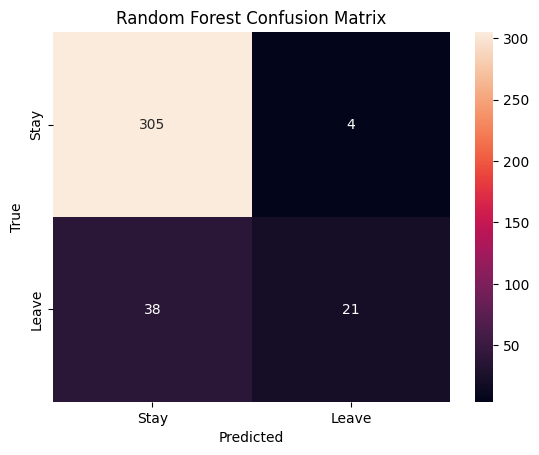

In [226]:
create_cm(y_test, y_pred, "Logistic Regression Confusion Matrix")

In [227]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       309
           1       0.84      0.36      0.50        59

    accuracy                           0.89       368
   macro avg       0.86      0.67      0.72       368
weighted avg       0.88      0.89      0.87       368



### 4.2 Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [229]:
y_pred = forest.predict(X_test)

In [230]:
rf_acc = accuracy_score(y_test, y_pred)
print("Random Forest accuracy score: {:.2%}%".format(rf_acc))

Random Forest accuracy score: 86.14%%


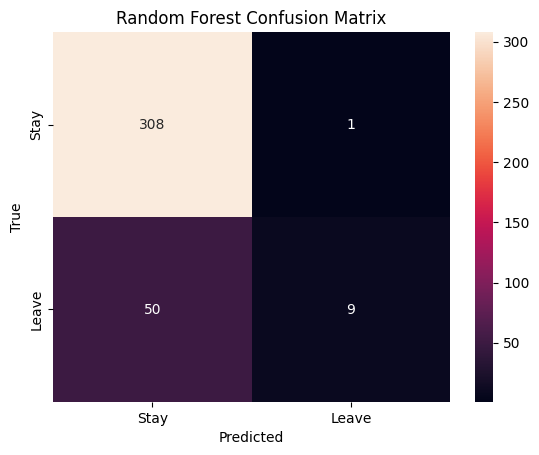

In [233]:
create_cm(y_test, y_pred, "Random Forest Confusion Matrix")

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       309
           1       0.90      0.15      0.26        59

    accuracy                           0.86       368
   macro avg       0.88      0.57      0.59       368
weighted avg       0.87      0.86      0.82       368



### 4.3 Neural Network

In [947]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

nn_model = Sequential()

nn_model.add(Dense(25, input_shape=(X_train.shape[1],), activation="relu",
                   kernel_initializer='he_uniform', kernel_regularizer='l2'))

nn_model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
                   kernel_regularizer='l2'))

nn_model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',
                   kernel_regularizer='l2'))

nn_model.add(Dense(1, activation='sigmoid'))

nn_model.summary()

Model: "sequential_104"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_313 (Dense)           (None, 25)                1275      
                                                                 
 dense_314 (Dense)           (None, 25)                650       
                                                                 
 dense_315 (Dense)           (None, 25)                650       
                                                                 
 dense_316 (Dense)           (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [948]:
nn_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [949]:
X_test_split, X_val, y_test_split, y_val = train_test_split(X_test, y_test, test_size = 0.5, stratify=y_test, random_state=0)

In [950]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 2.7315 - accuracy: 0.1688 - val_loss: 2.2535 - val_accuracy: 0.2120
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0435 - accuracy: 0.6261 - val_loss: 1.8371 - val_accuracy: 0.8478
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1.7657 - accuracy: 0.8394 - val_loss: 1.6791 - val_accuracy: 0.8424
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1.6547 - accuracy: 0.8385 - val_loss: 1.5823 - val_accuracy: 0.8424
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.5550 - accuracy: 0.8385 - val_loss: 1.4935 - val_accuracy: 0.8424
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4645 - accuracy: 0.8385 - val_loss: 1.4108 - val_accuracy: 0.8424
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3808 - accuracy: 0.8385 - val_loss: 1.3343 - val_accuracy: 0.8424
Epoch 8/100
1

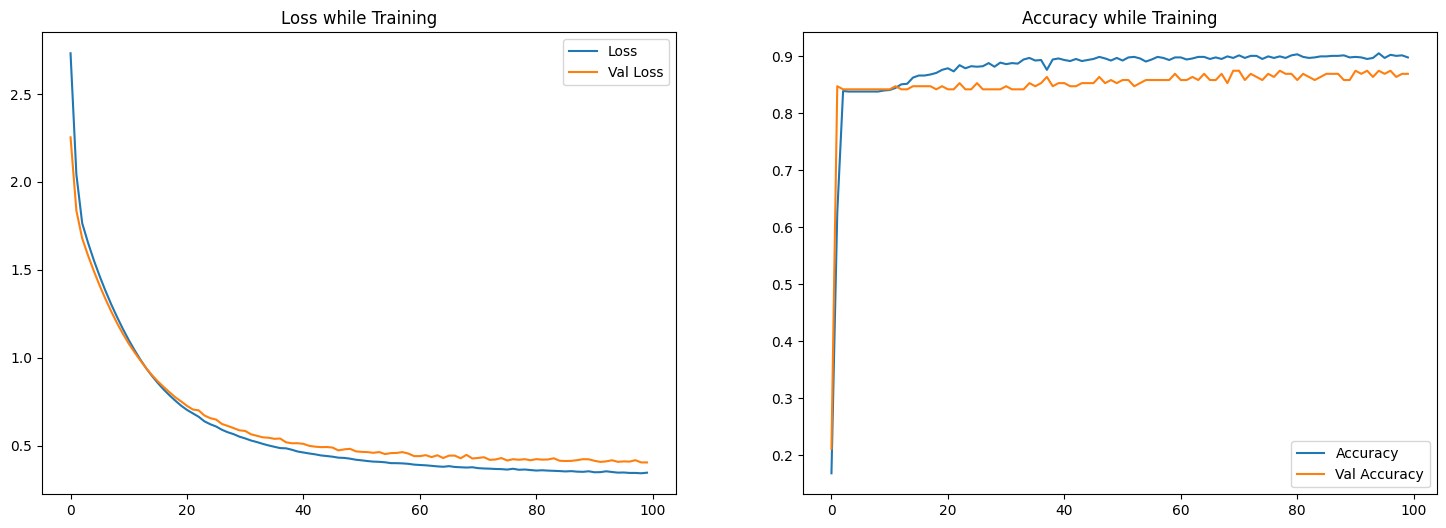

In [951]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss while Training")
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy while Training")
plt.legend()

plt.show()

In [952]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred >= 0.5)

12/12 [==============================] - 0s 909us/step


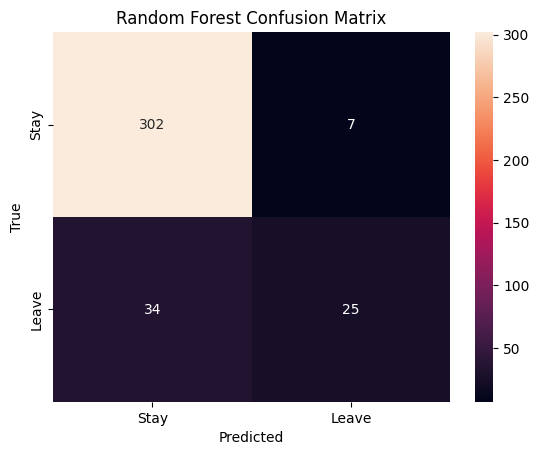

In [953]:
create_cm(y_test, y_pred, "Neural Network Confusion Matrix")

In [954]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       309
           1       0.78      0.42      0.55        59

    accuracy                           0.89       368
   macro avg       0.84      0.70      0.74       368
weighted avg       0.88      0.89      0.87       368



### 4.4 Choosing the best model

Here we have two great models: Logistic Regression and Neural Network. If computer resources were a problem, I would choose the Logistic Regression model, beucause it is much simpler than Neural Networks. But since they are not a problem, I am going to use the Neural Network model. First because it let me make some improvements in the future, for example Fine Tune the model, and second because they are much cooler.